<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br><br><br>

# Listed Volatility and Variance Derivatives

**Dr. Yves J. Hilpisch &mdash; Wiley Finance (2016)**

<img src="http://hilpisch.com/images/lvvd_cover.png" alt="Derivatives Analytics with Python" width="30%" align="left" border="0">

# Variance Futures at Eurex

## Introduction

## Variance Futures Concepts

### Realized Variance

### Net Present Value Concepts

#### Discount Factor

In [1]:
import pandas as pd

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
## read data from CSV file
eb = pd.read_csv('data/hist_EURIBOR_2015.csv',  # filename
                   index_col=0,  # index column
                   parse_dates=True,  # parsing date information
                   dayfirst=True)  # European date convention
eb.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 135 entries, 2015-01-02 to 2015-07-14
Data columns (total 8 columns):
1w     135 non-null float64
2w     135 non-null float64
1m     135 non-null float64
2m     135 non-null float64
3m     135 non-null float64
6m     135 non-null float64
9m     135 non-null float64
12m    135 non-null float64
dtypes: float64(8)
memory usage: 9.5 KB


In [4]:
import seaborn as sns; sns.set()
import matplotlib
matplotlib.rcParams['font.family'] = 'serif'
%matplotlib inline

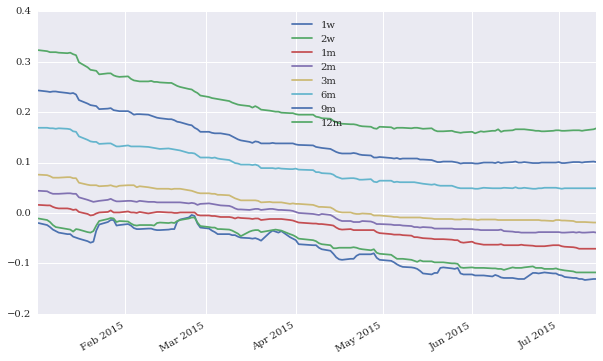

In [5]:
eb.plot(figsize=(10, 6));

In [6]:
eb.tail()

,1w,2w,1m,2m,3m,6m,9m,12m
2015-07-08,-0.131,-0.118,-0.071,-0.038,-0.018,0.049,0.101,0.164
2015-07-09,-0.131,-0.118,-0.071,-0.039,-0.018,0.049,0.100,0.163
2015-07-10,-0.133,-0.118,-0.071,-0.039,-0.018,0.049,0.101,0.164
2015-07-13,-0.131,-0.118,-0.071,-0.038,-0.019,0.049,0.102,0.166
2015-07-14,-0.131,-0.118,-0.071,-0.039,-0.019,0.049,0.101,0.168


In [7]:
import math
math.exp(-0.00168 * 365. / 365)

0.9983214104100598

#### ARMVM

In [8]:
## read data from Excel spreadsheet file
eo = pd.read_csv('data/hist_EONIA_2015.csv',  # filename
                   index_col=0,  # index column
                   parse_dates=True,  # parsing date information
                   dayfirst=True)  # European date convention
# eo.index = pd.DatetimeIndex(eo.index) 
eo.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 60 entries, 2015-04-21 to 2015-07-14
Data columns (total 1 columns):
EONIA    60 non-null float64
dtypes: float64(1)
memory usage: 960.0 bytes


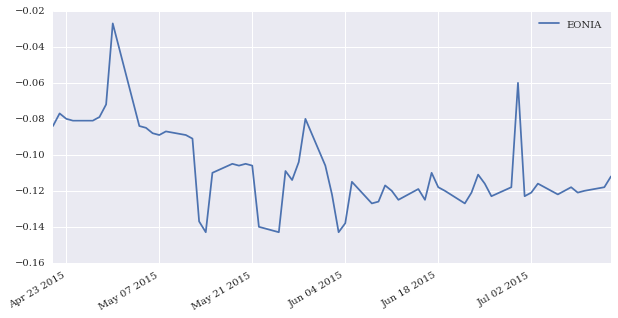

In [9]:
eo.plot(figsize=(10, 5));

In [10]:
eo.tail()

,EONIA
2015-07-08,-0.118
2015-07-09,-0.121
2015-07-10,-0.120
2015-07-13,-0.118
2015-07-14,-0.112


In [11]:
r_eo = -0.001

In [12]:
ARMVM3 = 0 * math.exp(r_eo / 365) + (3100 - 3000) * (math.exp(r_eo / 365) - 1)
ARMVM3

-0.0002739722274380796

In [13]:
ARMVM4 = (ARMVM3 * math.exp(r_eo / 365)
        + (3050 - 3000) * (math.exp(r_eo / 365) - 1))
ARMVM4

-0.0004109575905493053

### Traded Variance Strike

### Traded Futures Price

### Number of Futures

### Par Variance Strike

### Futures Settlement Price

## Example Calculation for a Variance Future

In [14]:
import pandas as pd
h5 = pd.HDFStore('data/SX5E_V6I1.h5', 'r')
data = h5['SX5E_V6I1']
h5.close()
data

,SX5E,V6I1
Date,,
2015-06-01,3575.04,25.8710
2015-06-02,3561.89,25.9232
2015-06-03,3583.82,25.7958
2015-06-04,3556.38,26.2418
2015-06-05,3510.01,27.4496
2015-06-08,3468.31,27.2996
2015-06-09,3456.79,26.8020
2015-06-10,3526.48,25.8610
2015-06-11,3551.91,26.3897


In [15]:
data = data.join(eb['2w'], how='left')
data = data.join(eo, how='left')
data

,SX5E,V6I1,2w,EONIA
Date,,,,
2015-06-01,3575.04,25.8710,-0.108,-0.106
2015-06-02,3561.89,25.9232,-0.109,-0.122
2015-06-03,3583.82,25.7958,-0.109,-0.143
2015-06-04,3556.38,26.2418,-0.109,-0.138
2015-06-05,3510.01,27.4496,-0.109,-0.115
2015-06-08,3468.31,27.2996,-0.110,-0.127
2015-06-09,3456.79,26.8020,-0.110,-0.126
2015-06-10,3526.48,25.8610,-0.111,-0.117
2015-06-11,3551.91,26.3897,-0.111,-0.120


In [16]:
import numpy as np
data['R_t'] = np.log(data['SX5E'] / data['SX5E'].shift(1))
data['sigma**2'] = 10000 * 252 * (np.cumsum(data['R_t'] ** 2)
                                  / np.arange(len(data)))
data

,SX5E,V6I1,2w,EONIA,R_t,sigma**2
Date,,,,,,
2015-06-01,3575.04,25.8710,-0.108,-0.106,NaN,NaN
2015-06-02,3561.89,25.9232,-0.109,-0.122,-0.003685,34.220799
2015-06-03,3583.82,25.7958,-0.109,-0.143,0.006138,64.580457
2015-06-04,3556.38,26.2418,-0.109,-0.138,-0.007686,92.677552
2015-06-05,3510.01,27.4496,-0.109,-0.115,-0.013124,178.023718
2015-06-08,3468.31,27.2996,-0.110,-0.127,-0.011951,214.408816
2015-06-09,3456.79,26.8020,-0.110,-0.126,-0.003327,183.323049
2015-06-10,3526.48,25.8610,-0.111,-0.117,0.019960,300.555651
2015-06-11,3551.91,26.3897,-0.111,-0.120,0.007185,279.249096


In [17]:
T = 15.
data['t'] = np.arange(1, 16)
data['t']

Date
2015-06-01     1
2015-06-02     2
2015-06-03     3
2015-06-04     4
2015-06-05     5
2015-06-08     6
2015-06-09     7
2015-06-10     8
2015-06-11     9
2015-06-12    10
2015-06-15    11
2015-06-16    12
2015-06-17    13
2015-06-18    14
2015-06-19    15
Name: t, dtype: int64

In [18]:
r_eb = -0.001
data['DF_t'] = np.exp(-r_eb * (T - data['t']) / 365.) 
data

,SX5E,V6I1,2w,EONIA,R_t,sigma**2,t,DF_t
Date,,,,,,,,
2015-06-01,3575.04,25.8710,-0.108,-0.106,NaN,NaN,1,1.000038
2015-06-02,3561.89,25.9232,-0.109,-0.122,-0.003685,34.220799,2,1.000036
2015-06-03,3583.82,25.7958,-0.109,-0.143,0.006138,64.580457,3,1.000033
2015-06-04,3556.38,26.2418,-0.109,-0.138,-0.007686,92.677552,4,1.000030
2015-06-05,3510.01,27.4496,-0.109,-0.115,-0.013124,178.023718,5,1.000027
2015-06-08,3468.31,27.2996,-0.110,-0.127,-0.011951,214.408816,6,1.000025
2015-06-09,3456.79,26.8020,-0.110,-0.126,-0.003327,183.323049,7,1.000022
2015-06-10,3526.48,25.8610,-0.111,-0.117,0.019960,300.555651,8,1.000019
2015-06-11,3551.91,26.3897,-0.111,-0.120,0.007185,279.249096,9,1.000016


In [19]:
sigma_K = data['V6I1'][0]
sigma_K

25.870999999999999

In [20]:
Notional = 100000 / (2 * sigma_K)
Notional

1932.665919369178

In [21]:
data['F_tS'] = 3000

data

,SX5E,V6I1,2w,EONIA,R_t,sigma**2,t,DF_t,F_tS
Date,,,,,,,,,
2015-06-01,3575.04,25.8710,-0.108,-0.106,NaN,NaN,1,1.000038,3000
2015-06-02,3561.89,25.9232,-0.109,-0.122,-0.003685,34.220799,2,1.000036,3000
2015-06-03,3583.82,25.7958,-0.109,-0.143,0.006138,64.580457,3,1.000033,3000
2015-06-04,3556.38,26.2418,-0.109,-0.138,-0.007686,92.677552,4,1.000030,3000
2015-06-05,3510.01,27.4496,-0.109,-0.115,-0.013124,178.023718,5,1.000027,3000
2015-06-08,3468.31,27.2996,-0.110,-0.127,-0.011951,214.408816,6,1.000025,3000
2015-06-09,3456.79,26.8020,-0.110,-0.126,-0.003327,183.323049,7,1.000022,3000
2015-06-10,3526.48,25.8610,-0.111,-0.117,0.019960,300.555651,8,1.000019,3000
2015-06-11,3551.91,26.3897,-0.111,-0.120,0.007185,279.249096,9,1.000016,3000


In [22]:
data['ARMVM_t'] = 0.0

In [23]:
data['F_tS'][1] = data['DF_t'][1] * ((data['t'][1] * data['sigma**2'][1]
                    + (T - data['t'][1]) * data['V6I1'][1] ** 2) / T
                    - sigma_K ** 2) + 3000
data['F_tS'][1]                                      

2917

In [24]:
for t in data.index[1:]:
    data['ARMVM_t'][t] = (data['ARMVM_t'].shift(1)[t]
                          * math.exp(data['EONIA'].shift(1)[t] / 252)
                       + (data['F_tS'].shift(1)[t] - 3000)
                         * (math.exp(data['EONIA'].shift(1)[t] / 252) - 1))
    data['F_tS'][t] = data['DF_t'][t] * ((data['t'][t] * data['sigma**2'][t]
                          + (T - data['t'][t]) * data['V6I1'][t] ** 2) / T
                          - sigma_K ** 2) - data['ARMVM_t'][t] + 3000

In [25]:
data

,SX5E,V6I1,2w,EONIA,R_t,sigma**2,t,DF_t,F_tS,ARMVM_t
Date,,,,,,,,,,
2015-06-01,3575.04,25.8710,-0.108,-0.106,NaN,NaN,1,1.000038,3000,0.000000
2015-06-02,3561.89,25.9232,-0.109,-0.122,-0.003685,34.220799,2,1.000036,2917,0.000000
2015-06-03,3583.82,25.7958,-0.109,-0.143,0.006138,64.580457,3,1.000033,2875,0.040173
2015-06-04,3556.38,26.2418,-0.109,-0.138,-0.007686,92.677552,4,1.000030,2860,0.111062
2015-06-05,3510.01,27.4496,-0.109,-0.115,-0.013124,178.023718,5,1.000027,2892,0.187647
2015-06-08,3468.31,27.2996,-0.110,-0.127,-0.011951,214.408816,6,1.000025,2863,0.236836
2015-06-09,3456.79,26.8020,-0.110,-0.126,-0.003327,183.323049,7,1.000022,2799,0.305743
2015-06-10,3526.48,25.8610,-0.111,-0.117,0.019960,300.555651,8,1.000019,2802,0.406065
2015-06-11,3551.91,26.3897,-0.111,-0.120,0.007185,279.249096,9,1.000016,2776,0.497784


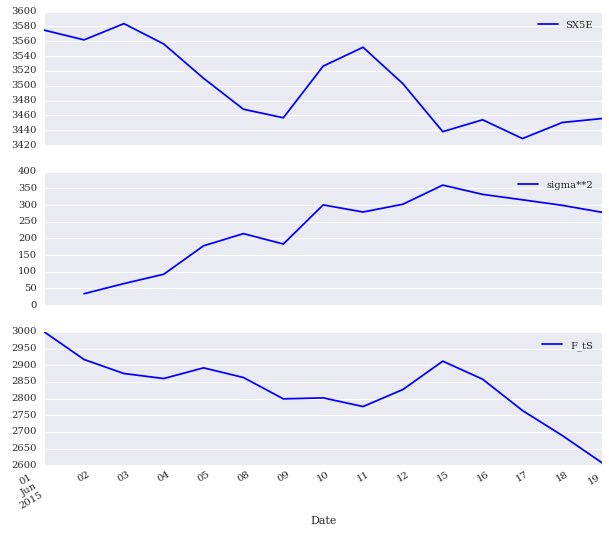

In [26]:
data[['SX5E', 'sigma**2', 'F_tS']].plot(subplots=True,
                                       color='blue',
                                       figsize=(10, 9));

In [27]:
h5 = pd.HDFStore('data/var_data.h5', 'a')
h5['var_future'] = data
h5.close()

## Comparison of Variance Swap and Future

In [28]:
h5 = pd.HDFStore('data/var_data.h5', 'r')
var_swap = h5['var_swap']
h5.close()

In [29]:
comp = pd.DataFrame({'F_tS': data['F_tS'] - 3000,
                     'V_t': var_swap['V_t']}, index=data.index)
comp

,F_tS,V_t
Date,,
2015-06-01,0,0.000000
2015-06-02,-83,-82.332277
2015-06-03,-125,-124.049833
2015-06-04,-140,-139.593571
2015-06-05,-108,-107.644092
2015-06-08,-137,-136.380856
2015-06-09,-201,-200.634978
2015-06-10,-198,-196.905901
2015-06-11,-224,-223.189008


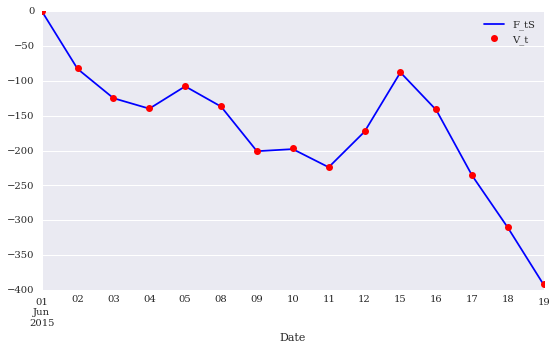

In [30]:
comp.plot(style=['b', 'ro'], figsize=(9, 5));

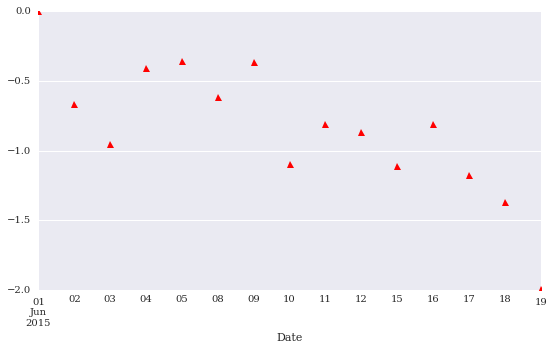

In [31]:
(comp['F_tS'] - comp['V_t']).plot(style='r^', figsize=(9, 5));

## Conclusions

<img src="http://hilpisch.com/tpq_logo.png" alt="The Python Quants" width="35%" align="right" border="0"><br>

<a href="http://tpq.io" target="_blank">http://tpq.io</a> | <a href="http://twitter.com/dyjh" target="_blank">@dyjh</a> | <a href="mailto:team@tpq.io">team@tpq.io</a>

**DX Analytics** |
<a href="http://dx-analytics.com">http://dx-analytics.com</a>

**Quant Platform** |
<a href="http://quant-platform.com">http://quant-platform.com</a>

**Python for Finance Books** |
<a href="http://books.tpq.io" target="_blank">http://books.tpq.io</a>

**Python for Finance Training** |
<a href="http://training.tpq.io" target="_blank">http://training.tpq.io</a>